[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/COGS108/Lectures-Sp25/blob/master/09_inference.ipynb)

## Inference

- Association between variables: **Pearson's correlation coefficient**
- Models: **Ordinary Linear Regression (OLS)**
  - **simple linear regression**
    - effect size
    - p-value
    - interpretation
  - **multiple linear regression**
    - confounding
  - working with **transformed data**
- Comparison of means: **Student's t test**



To answer our quiz questions today please open this link in seperate browser tab or window:

https://forms.gle/4mdyN7coMuurGR3H9

We will be going back and forth from the notebook to this quiz several times

In [1]:
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set_theme(style="white",
              font_scale=2,
              rc={'axes.spines.right': False,'axes.spines.top': False}) # this last thing is equivalent to always having sns.despine()

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (8, 8)

# Statmodels & patsy
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import pearsonr, norm, ttest_ind, skewnorm

#
#import warnings
#warnings.filterwarnings('ignore')

#improve resolution
%config InlineBackend.figure_format ='retina'

# Correlation: Pearson correlation ($r$)

- Measures the strength of association between two variables
- Takes values [-1,1]
- Positive Correlation
    - $r$ > 0
    - as $r$ approaches 1, x and y are highly correlated
    - $r$ approaching 1 can happen with a shallow sloped line of regression
    - $r$ approaching (not quite) 0 can happen with a steep sloped line of regression
- Negative Correlation
    - $r$ < 0
    - as $r$ approaches -1, x and y are highly negatively correlated
    - $r$ approaching -1 can happen with a shallow sloped line of regression
    - $r$ approaching (not quite) 0 can happen with a steep sloped line of regression
- Zero Correlation
   - $r \approx 0$
   - as $r$ approaches 0, x and y are not correlated
   - as $r$ approaches 0, the slope of the line of regression becomes 0 (horizontal)

## No Correlation example


correlation coefficients:
 [[1.         0.00404702]
 [0.00404702 1.        ]]


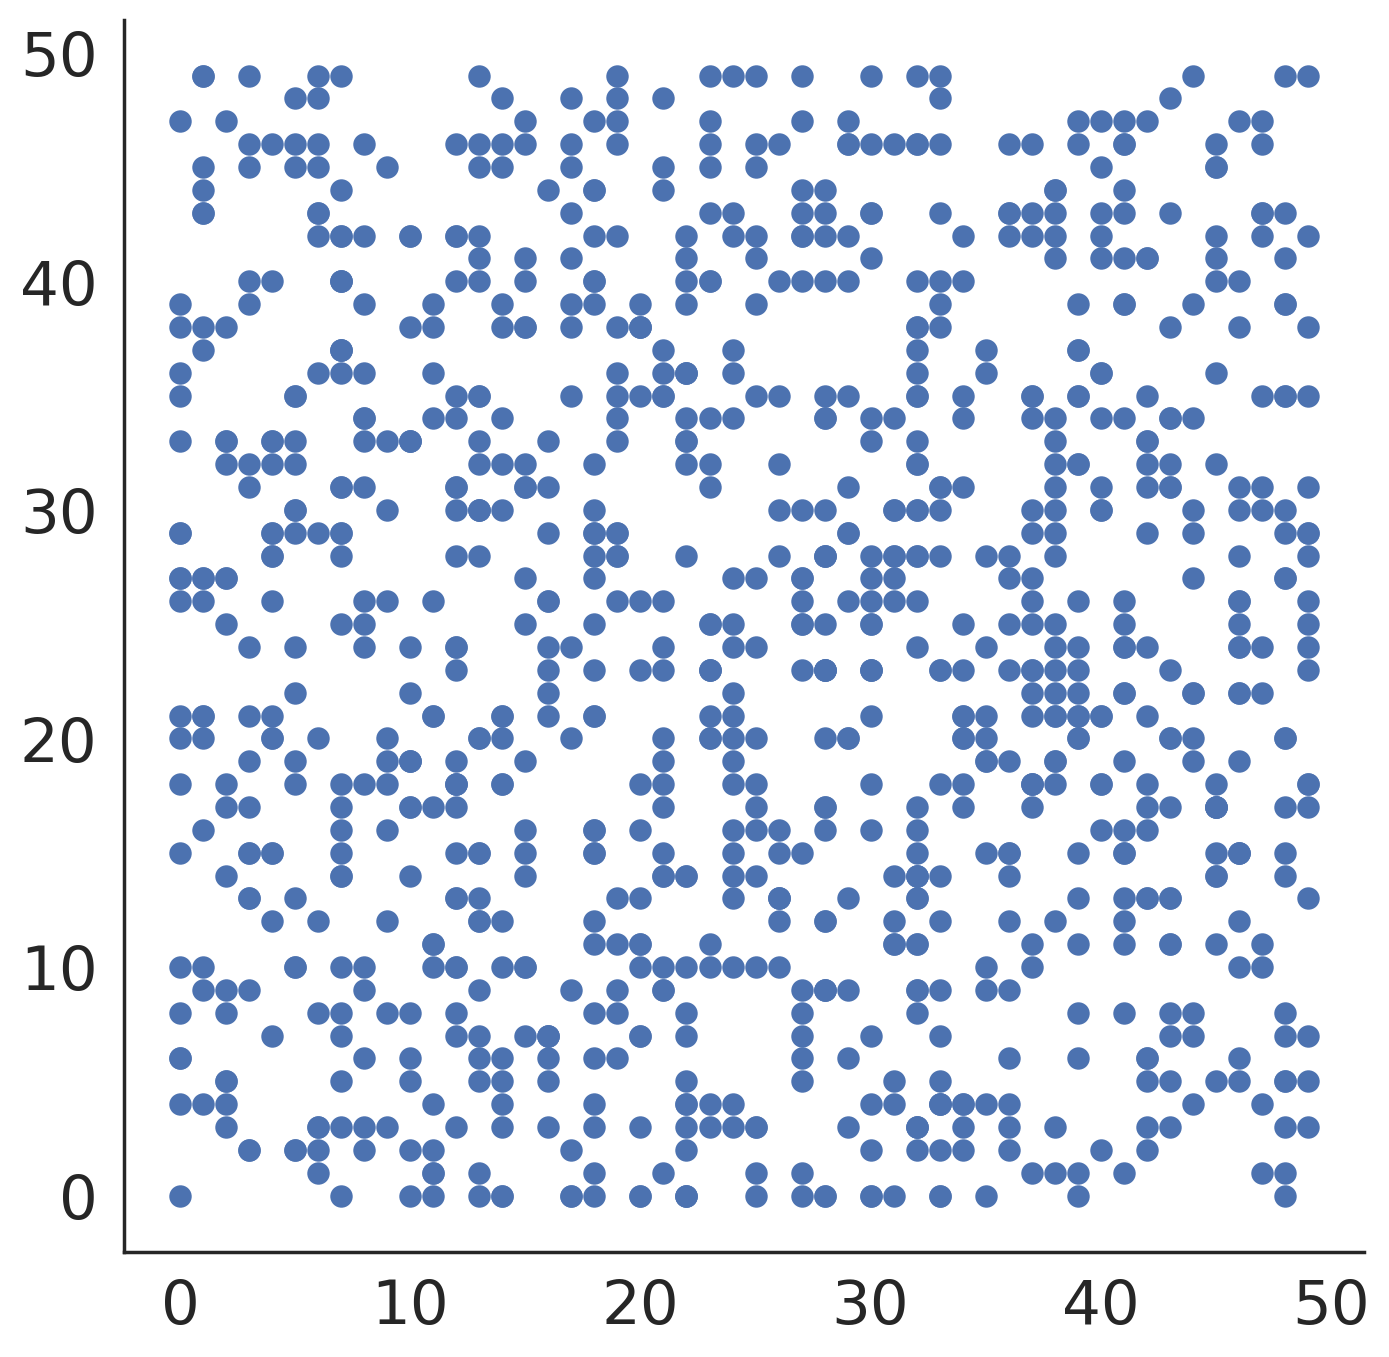

In [2]:
np.random.seed(1)

# x and y are uncorrelated because they are independent draws of random numbers
# the value of x does not depend on the corresponding value of y and vice versa
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)

plt.scatter(x, y, s=50);
print('correlation coefficients:\n', np.corrcoef(x, y))

### Clicker Question

What would you expect Pearson correlation for the following relationship to be? Note that the value of y is a function of x plus some random noise added in

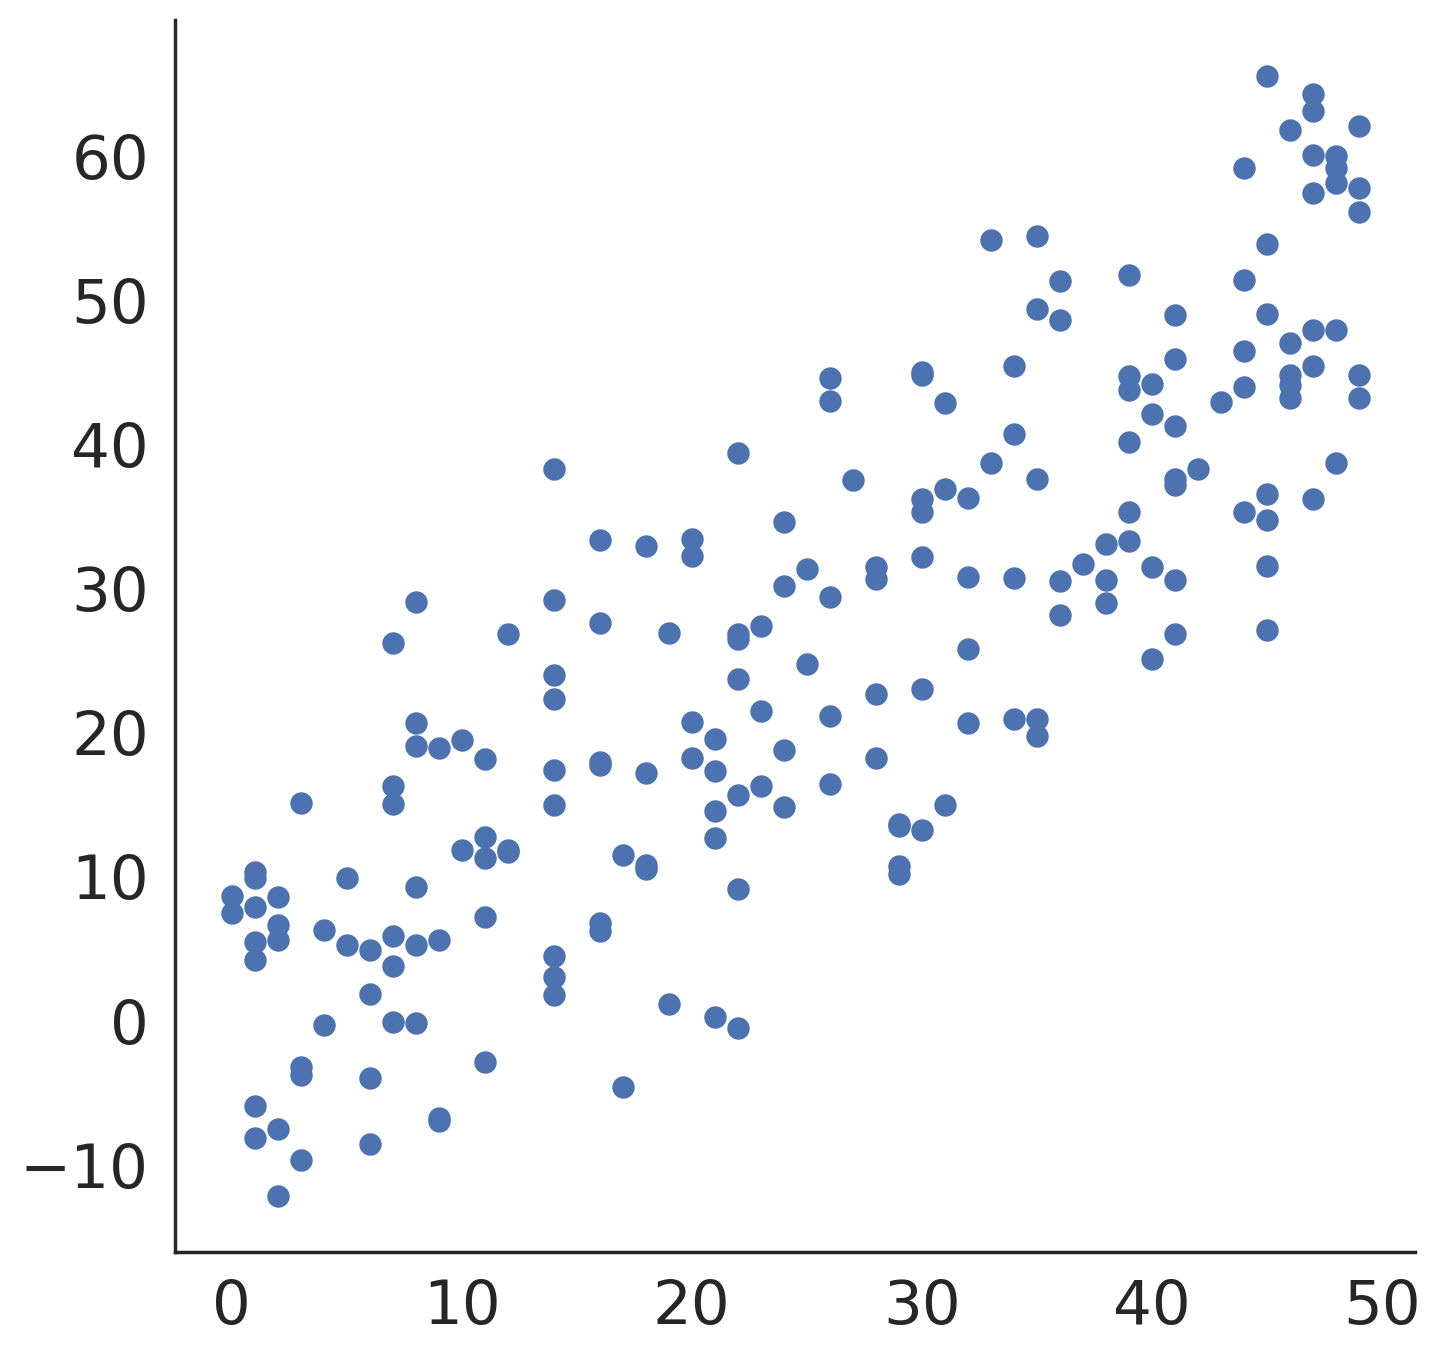

In [3]:
# setting a random seed makes this answer repeatable
np.random.seed(888)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 200)
y = x + np.random.normal(0, 10, 200)

plt.scatter(x, y, s=50);

- A) -0.8
- B) -0.4
- C) 0
- D) 0.4
- E) 0.8

In [4]:
print('correlation coefficients:\n', np.corrcoef(x, y))

correlation coefficients:
 [[1.         0.83334929]
 [0.83334929 1.        ]]


## The Data
Here is some data we will use to explore inference.  Both for regression models and t-tests.  

The rows show (for a particular point in time) values for US states

The columns show
- Percent of people with incomes low enough to be classed as living in poverty
- Birth rates for mothers who are in different age bands
- An overall teen birth rate (combining different age bands)
- A rate of violent crimes committed


In [5]:
# read in file; specify that it is tab-separated file
df = ( pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/index.txt', sep='\t')
      .set_index('Location') )
df.head()

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
Location,,,,,
Alabama,20.1,31.5,88.7,11.2,54.5
Alaska,7.1,18.9,73.7,9.1,39.5
Arizona,16.1,35.0,102.5,10.4,61.2
Arkansas,14.9,31.6,101.7,10.4,59.9
California,16.7,22.6,69.1,11.2,41.1


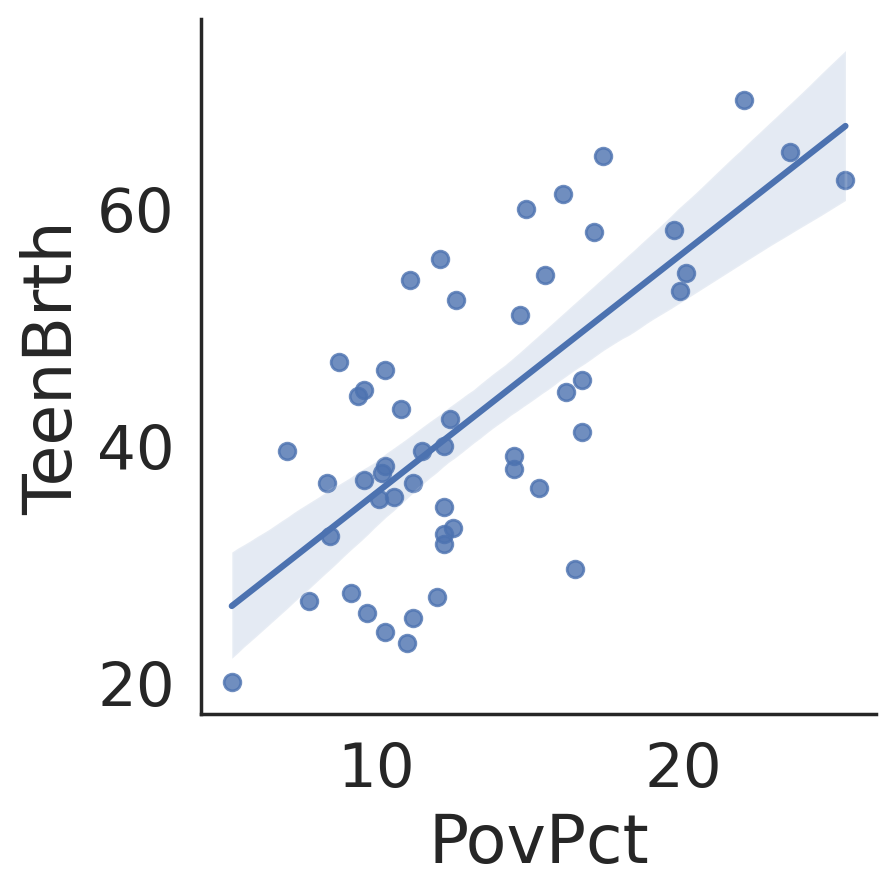

In [8]:
# use this cell to explore the data... time for EDA!

df.shape
sns.lmplot(x='PovPct', y='TeenBrth', data=df);

# Look at univariate shape and stats
# Look at relationships between variables... what do scatter plots look like? are the correlations between variables?
# nb: you can use both pandas and numpy methods to examine correlations and summary stats.  Just pick one!
# you can use pandas, matplotlib, and seaborn to do EDA graphs.  Just pick one!



### So, which two variables...
would you like to explore with a linear regression?  I'm going to start with my own pick, but you can modify these cells to do what you want :)

## Assumptions of Linear Regression

1. Linear relationship
2. No multicollinearity
3. No auto-correlation
4. Homoscedasticity

Let's check these assumptions in the data!

There's no multi colinearity becasue we are only exploring two variables.
There's no auto-correlation because there's no time variable here

NB: you can check for all of these issues with tools built into our regression package `statsmodels` https://www.statsmodels.org/stable/diagnostic.html

In [ ]:
# check linearity and homo/heteroscasticity by eyeball using sns.lmplot here!

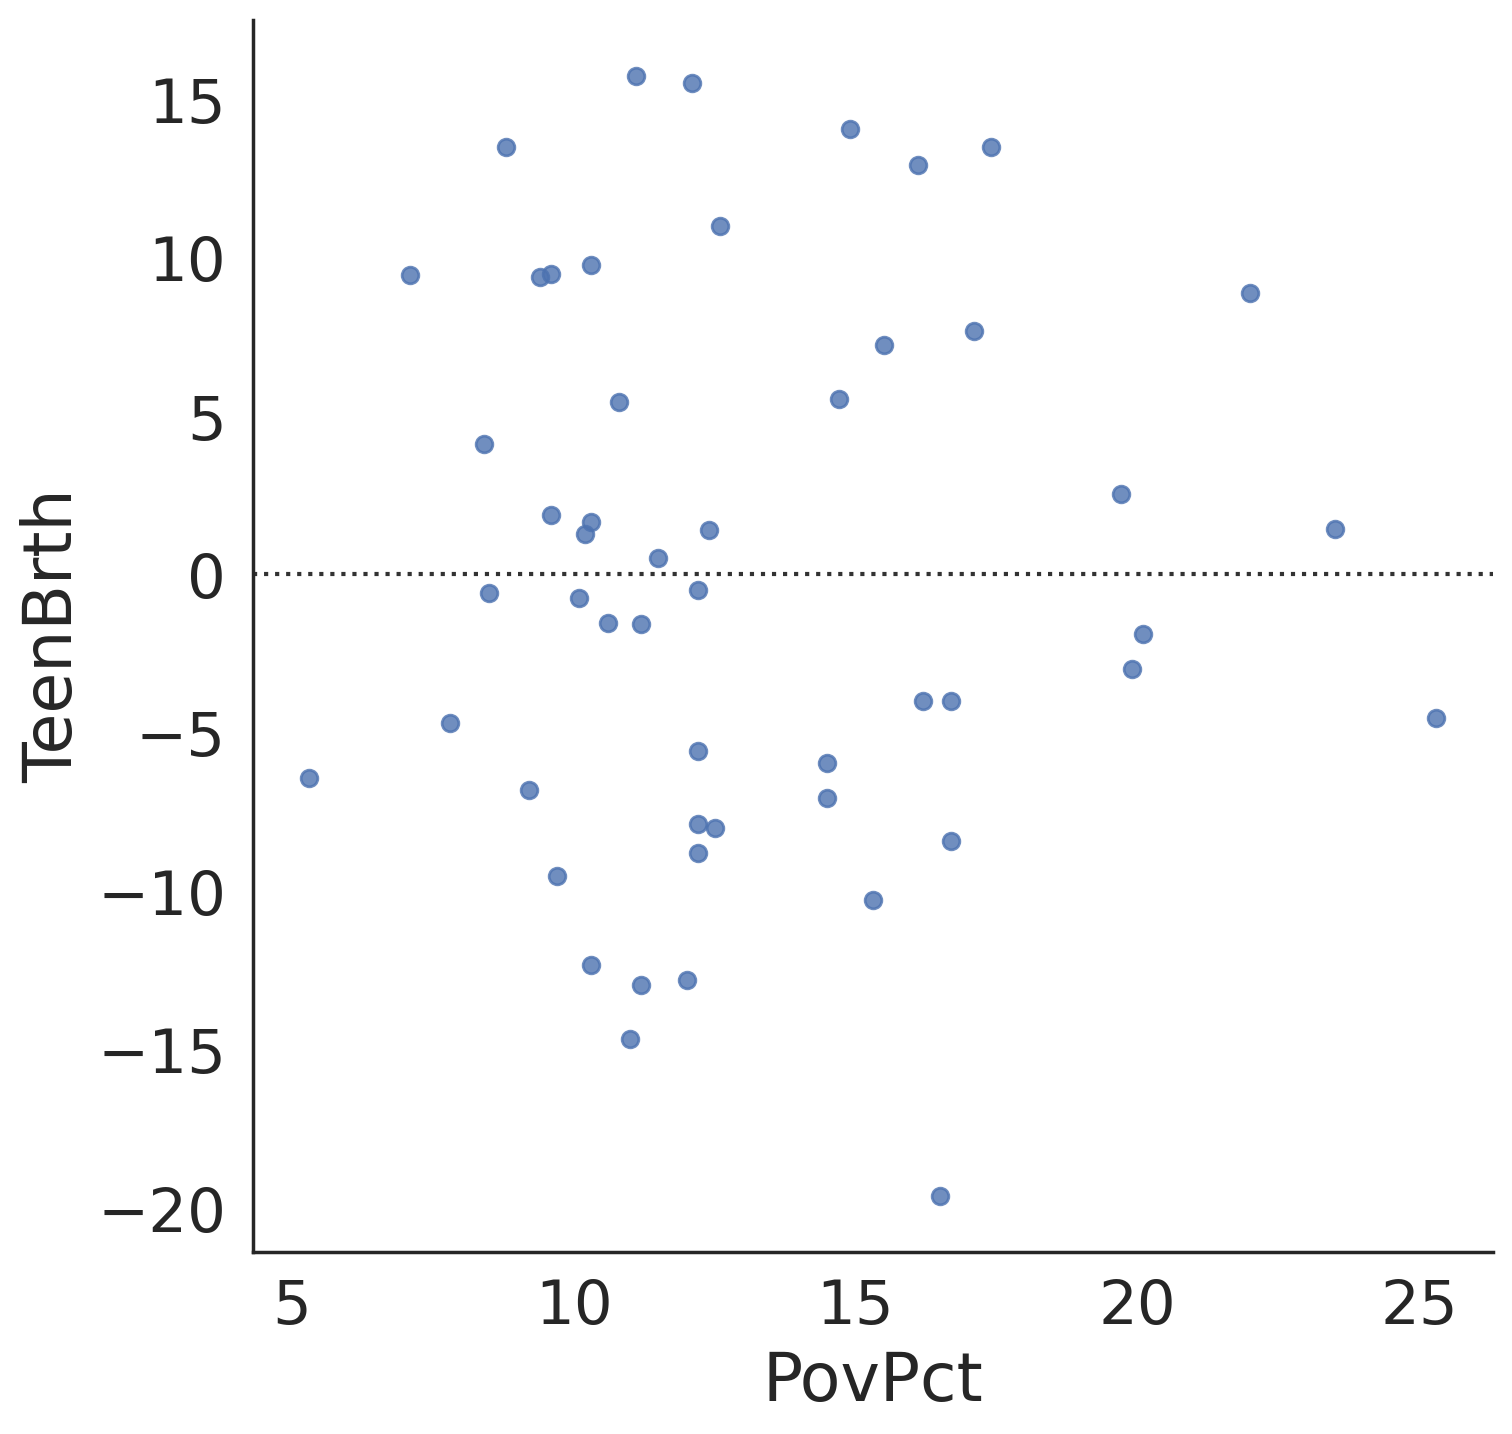

In [10]:
sns.residplot(x='PovPct', y='TeenBrth', data=df);


## Linear Regression

$$outcome = \beta_0 + \beta_1*predictor$$

First, let's be sure we're on the same page about what our outcome is. Here, we're intererested in whether **Poverty Percentage (predictor)** impacts **Teen Birth Rate (outcome)**.

In [12]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# OLD SKOOL way to do this
# We can specify our model matrix using `pastsy`.
#outcome, predictors = patsy.dmatrices('TeenBrth ~ PovPct', df)
#model = sm.OLS(outcome, predictors)


# Its much nicer to use the MODERN formulae interface instead!
# I suggest that you just always use this!
model = smf.ols(formula='TeenBrth ~ PovPct', data=df)


In [16]:
model.

SyntaxError: invalid syntax (<ipython-input-16-e5c9403477cf>, line 1)

And, then we just have to fit the model and look at the results.

In [17]:
## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     47.95
Date:                Mon, 05 May 2025   Prob (F-statistic):           8.67e-09
Time:                        21:20:14   Log-Likelihood:                -182.53
No. Observations:                  51   AIC:                             369.1
Df Residuals:                      49   BIC:                             372.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6737      4.032      3.888      0.0

### Question #1

What is the effect size of the relationship between Poverty Percentage and Teen Birth Rate?

- A) 15.67
- B) 2.03
- C) 4.032
- D) 0.495

There is a lot of information in there. Let's focus on the three pieces we discussed last lecture:

- `coef` : $\beta_1$ estimate explaining the effect size
- `std err` : standard error
- `P>|t|` : the p-value

## Interpretation

$$outcome = \beta_0 + \beta_1*predictor$$

$$ Teen Birth = 15.67 + 2.03  * Poverty Percentage $$

If the Poverty Percentage were 0, the Teen Birth Rate would be **15.67** (The Intercept, $\beta_0$)

For every 1 unit increase in Poverty Percentage, you expect to see a **2.03** unit increase in Teen Birth Rate (The effect size, $\beta_1$)

In [20]:
## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     47.95
Date:                Mon, 05 May 2025   Prob (F-statistic):           8.67e-09
Time:                        21:37:03   Log-Likelihood:                -182.53
No. Observations:                  51   AIC:                             369.1
Df Residuals:                      49   BIC:                             372.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6737      4.032      3.888      0.0

### Question #2

Which value represents the expected Teen Birth Rate if the Poverty Percentage were 0?

- A) 15.67
- B) 2.03
- C) 4.032
- D) 0.495

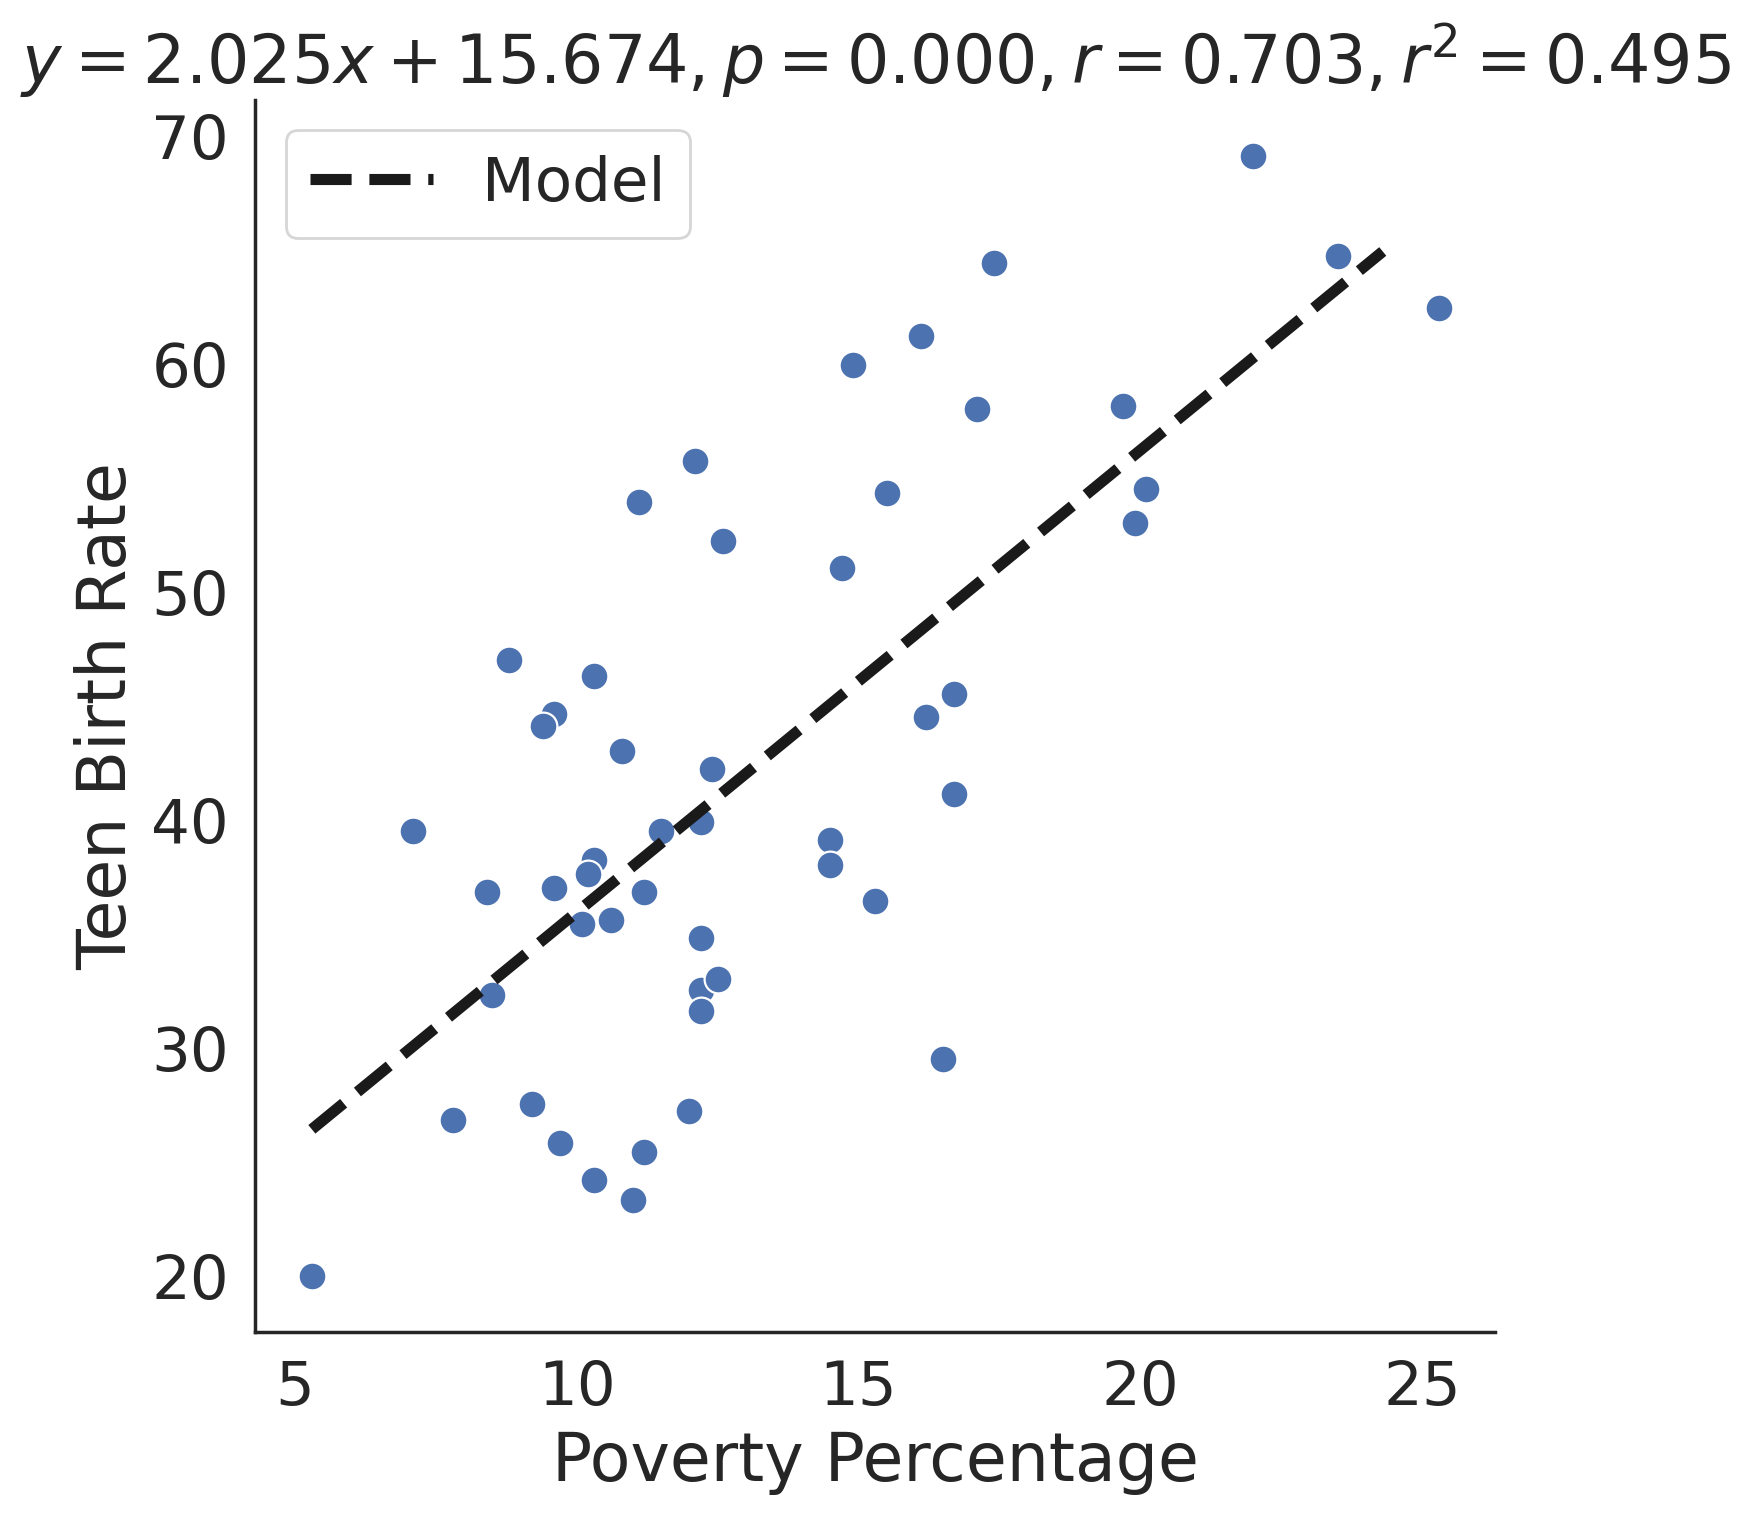

In [21]:
# Plot the orginal data (as before)
sns.scatterplot(x='PovPct', y='TeenBrth', data=df, s=100)

# Generate and plot the model fit line
xs = np.arange(df['PovPct'].min(), df['PovPct'].max())
ys = results.params.iloc[1] * xs + results.params.iloc[0]
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

# make the title tell us model parameters
vals='$y={:.3f}x + {:.3f}, p={:.3f}, r={:.3f}, r^2={:.3f}$'.format(results.params.iloc[1],
                                                                   results.params.iloc[0],
                                                                   results.pvalues.iloc[1],
                                                                   df[['PovPct','TeenBrth']].corr().iloc[0,1],
                                                                   results.rsquared)
plt.title(vals);

plt.xlabel('Poverty Percentage')
plt.ylabel('Teen Birth Rate')
plt.legend();

The model (the line) mathematically describes the relationship between the data points, but it doesn't explain the relationship *perfectly*. (All models are wrong!)

Note that this line of regression comes from minimizing the Residual Sum of Squares (RSS):
- if you were to draw a perpendicular line from each point to the line and calculate that distance, that is the residual
- The RSS is if you square that residual and then sum across all points
- this line of regression is the slope/intercept that minimizes RSS.
- the method of minimizing RSS is called Ordinary Lease Squares or OLS

## Estimates

If I told you a locations' Poverty Percentage, what would you guess its Teen Birth Rate would be?

### Clicker Question #3

If I told you the Poverty Percentage of a state was 15, what would you estimate would be its Teen Birth Rate?
- A) ~ 0
- B) ~ 30
- C) ~ 40
- D) ~ 50
- E) ~ 60

### Clicker Question #4

Which of the following is a reasonable estimate (guess) for a state with a Poverty Percentage of 20?

- A) 55.99
- B) 56.27
- C) 56.5
- D) A - C
- E) None of the above

### Clicker Question #5

What is our conclusion from this analysis? (Question: Does Poverty Percentage affect Teen Birth Rate?)

- A) Reject the null; There is no relationship between Poverty Percentage and Teen Birth Rate
- B) Reject the null; There is a relationship between Poverty Percentage and Teen Birth Rate
- C) Fail to reject the null; There is no relationship between Poverty Percentage and Teen Birth Rate
- D) Fail to reject the null; There is a relationship between Poverty Percentage and Teen Birth Rate


# Multiple Linear Regression

So far, we've only been looking at the relationship of one measure (Poverty Percentage) on Teen Birth.

*But*, Poverty Percentage is likely *not* the only thing that affects Teen Birth Rate.

We could imagine that Violent Crime rates in a location may affect both Poverty Percentage and could possibly affect Teen Birth Rate. (A confounder!)

This is where **multiple linear regression** is incredibly helpful. Multiple linear regression allows you to measure the effect of multiple predictors on an outcome.

Let's do some EDA first to see if our hypothesis (Violent Crime is related to Teen Birth) holds up in our data at all

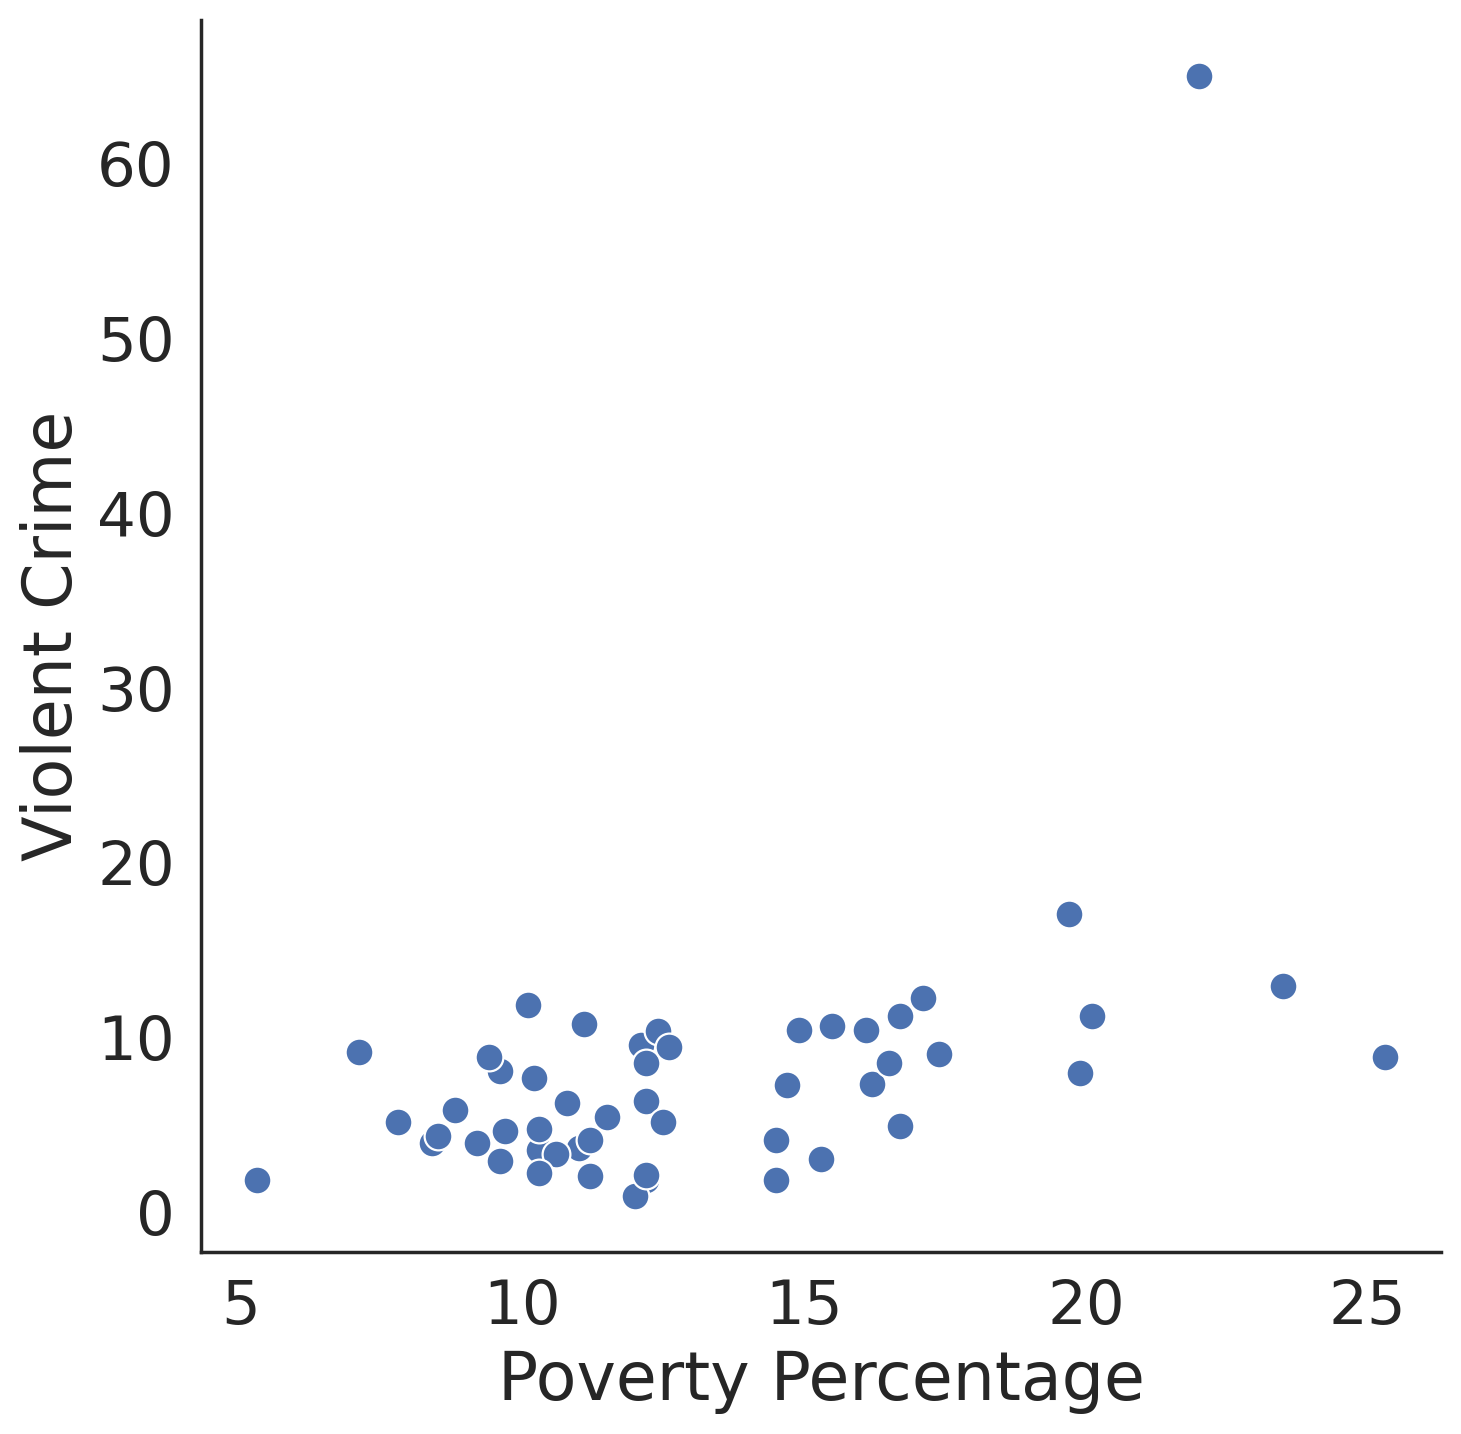

In [22]:
# relationship between predictors
sns.scatterplot(x='PovPct', y='ViolCrime', data=df, s=100)
plt.xlabel('Poverty Percentage')
plt.ylabel('Violent Crime');

### Outlier handling

Ugh! there's some nasty outlier going on there.... if we remove it maybe we will be able to see some relationship but we can't right now because that one huge violent crime location is messing up the plot

In [23]:
df[df['ViolCrime'] > 50]

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
Location,,,,,
District_of_Columbia,22.0,44.8,101.5,65.0,69.1


In [24]:
# removing DC
df = df[df['ViolCrime'] < 50]

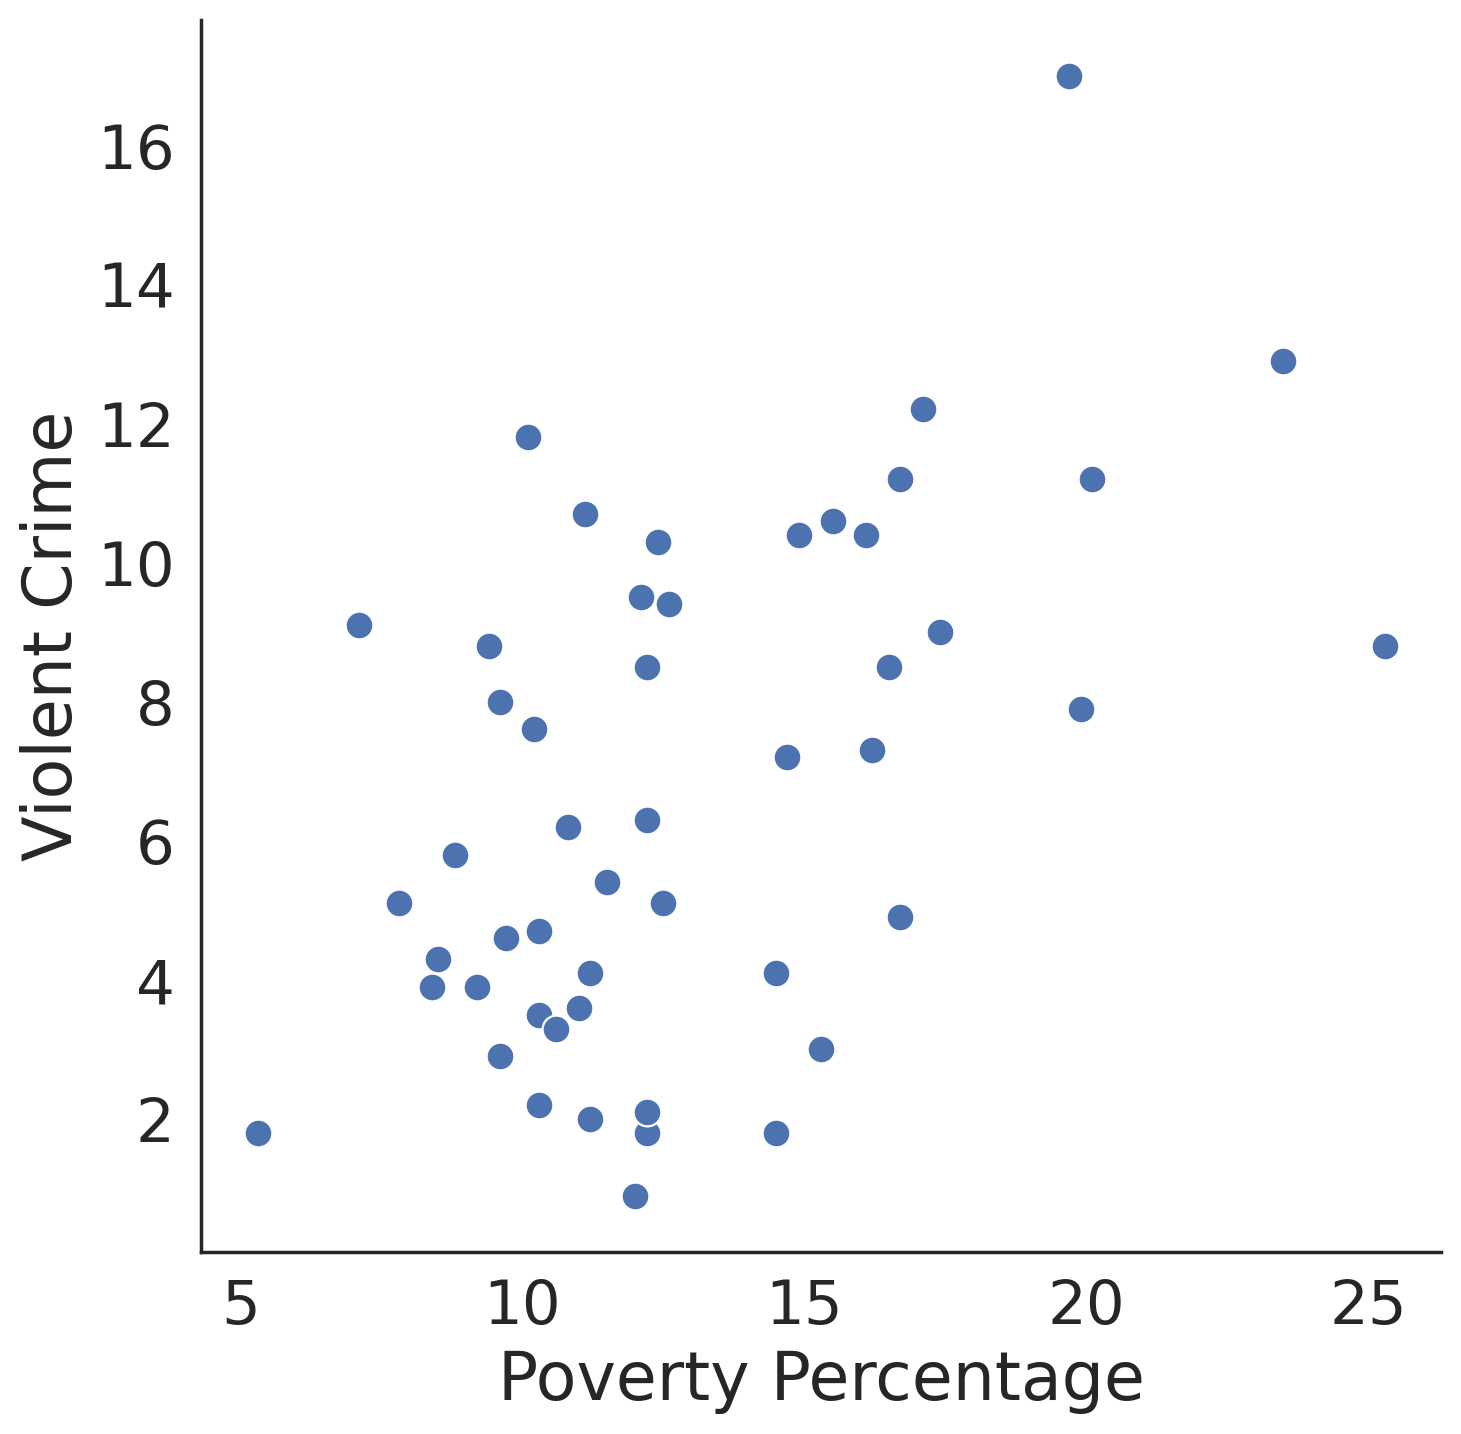

In [25]:
# relationship between predictors
# after removing outlier
sns.scatterplot(x='PovPct', y='ViolCrime', data=df, s=100)
plt.xlabel('Poverty Percentage')
plt.ylabel('Violent Crime');

Yay, now we can see what looks like a potentially linear relationship between poverty and violent crime.

But BEWARE!  Removing an outlier WILL change the coefficients of the regression!

We did it here because the outlier was so big it might destroy the linear relationship.  But that's a judgement call, there is no "right way" when it comes to outlier removal.

Maybe if you've got time, you should rerun the analysis below WITHOUT removing DC... see what's different :)


#### Alternatively

Instead of removing outliers you could use things other than sum of squared errors as your optimization metric.  These techniques generally fall under the nme of "robust regression" becuase they try to (mostly) ignore the outliers rather than removing them.   Yes statsmodels can do robust regression.  Yes you should study the math at some point instead of just using it.  But this link will show you how simple it can be to use (even if you don't understand the math).  And more to the point, there's a lovely diagram showing you the difference between OLS and robust lines of regression https://www.statsmodels.org/stable/examples/notebooks/generated/robust_models_0.html#Example-2:-linear-function-with-linear-truth


In [26]:
mod = smf.ols(formula='TeenBrth ~ PovPct', data=df)
respp = mod.fit()
print(respp.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     39.78
Date:                Mon, 05 May 2025   Prob (F-statistic):           8.50e-08
Time:                        21:39:44   Log-Likelihood:                -178.86
No. Observations:                  50   AIC:                             361.7
Df Residuals:                      48   BIC:                             365.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7423      4.151      4.034      0.0

In [27]:

mod = smf.ols(formula='TeenBrth ~ ViolCrime', data=df)
resvc = mod.fit()
print(resvc.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     49.94
Date:                Mon, 05 May 2025   Prob (F-statistic):           5.81e-09
Time:                        21:40:09   Log-Likelihood:                -176.12
No. Observations:                  50   AIC:                             356.2
Df Residuals:                      48   BIC:                             360.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0510      2.511     10.374      0.0

In [29]:

mod = smf.ols(formula='TeenBrth ~ PovPct + ViolCrime', data=df)
resppvc = mod.fit()
print(resppvc.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     41.17
Date:                Mon, 05 May 2025   Prob (F-statistic):           4.67e-11
Time:                        21:44:09   Log-Likelihood:                -168.65
No. Observations:                  50   AIC:                             343.3
Df Residuals:                      47   BIC:                             349.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.3419      3.431      4.471      0.0

### Clicker Question #6

Which has a larger effect on Teen Birth Rate?

- A) Poverty Percentage
- B) Violent Crime
- C) Effect is equal across all predictors
- D) No predictors have an effect on outcome

$$ Teen Birth = 15.3 + (1.19  * Poverty Percentage) + (1.63 * Violent Crime) $$

If the Poverty Percntage *and* Violent Crime were both 0, the Teen Birth Rate would be **15.3** (The Intercept, aka $\beta_0$)

Holding Violent crime constant, for every 1 unit increase in Poverty Percentage, you expect to see a **1.9** unit increase in Teen Birth Rate (The effect size, $\beta_1$)

Holding Poverty Percentage constant, for every 1 unit increase in Violent crime, you'd expect to see a **1.63** unit increase in Teen Birth Rate (The effect size, $\beta_2$)


## Model selection

We've now seen 3 different models
1. TB ~ PP
2. TB ~ VC
3. TB ~ PP + VC

Let's review the different model fits... hopefully they contain a way to select which model best fits the data! (spoiler, they do)

In [30]:
print(respp.summary())
print(resvc.summary())
print(resppvc.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     39.78
Date:                Mon, 05 May 2025   Prob (F-statistic):           8.50e-08
Time:                        21:44:13   Log-Likelihood:                -178.86
No. Observations:                  50   AIC:                             361.7
Df Residuals:                      48   BIC:                             365.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7423      4.151      4.034      0.0

Much of the right hand column (R-squared through BIC) of the summary table are methods of *in-sample* model selection.

In-sample means that these are measures meant to be used when you are evaluating how good a model is using the same data you are using to fit the model.  In-sample stands in contrast to out-of-sample methods you might have heard of like cross-validation (which uses different subsets of the data to fit a model than it does when selecting which model to use)

Lets start with R-squared.  R-squared is a **goodness-of-fit** measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.  We already know that Pearson's r having a value close to +1/-1 means the datapoints lie basically on a straight line.  When $r=1$the dots fall perfectly on the line, and knowing X uniquely determines Y... there is no noise.  When r is closer to zero noise is most of what we are seeing and knowing X doesn't tell us much about the corresponding Y value.  R-squared is literally Pearson's r, squared.  So it has the same properties plus it can be literally interpreted as "percent of the variance of Y which is explained by knowing X", AKA "percent variance explained". Models with high variance explained are models that fit their data well.

But selecting a model is MORE than just "did it fit the data well".

To do in-sample model selection you want ignore R-squared and instead look at ANY of the following metrics
- Adj. R-squared
- AIC
- BIC

Going into the math details of these different measures here is beyond the scope of this notebook.  For a full treatment I suggest Chapter 6 of the free textbook https://www.statlearning.com.  For a quick intro I found these slides useful https://pages.stat.wisc.edu/~ane/st572/notes/lec05.pdf

For an ever quicker introduction you need to understand an important principle.... the parsimony principle.  Parsimony is the idea (AKA, Occam's razor) that if two models fit the data equally well (e.g., have the roughly the same R-squared) then we should prefer the simpler model.  How is one model simpler than the others?  A simpler model has fewer X variables than a complex one.  If we try to fit a line through 10 datapoints in 2 dimensions then it has 2 parameters (slope/intercept) and that's pretty simple.  But if we try to fit a 9th order polynomial (it has terms with $x^9, x^8, \ldots, x$ plus an intercept) then we will *perfectly* hit all 10 datapoints with zero RSS.  But this wiggly curve will NOT generalize well to new data... we refer to this an overfit model because it is overly complex and fitting noise in the data as if it was signal.

Adjusted R-squared, AIC, and BIC are all metrics that are related to each other (again math details elsewhere).  These metrics reflect how good a model is at fitting data, but they also have complexity penalties built into them.  If two models fit the data the same, but one is more complex these metrics will prefer the simpler model.

Adjusted R-squared goes UP for better fit/simpler models and DOWN for worse fit/more complex models.

AIC and BIC do the opposite.  They go DOWN for better fit/simpler models and UP for worse fit/more complex models.

Any of these metrics can be used to select among different potential models (e.g., our 3 models above).  Generally BIC hates complex models more than the other two if you're looking to penalize model complexity.

So let's compare our 3 models using BIC from the results tables above.... which model do you prefer?



## Regressing categorical variables

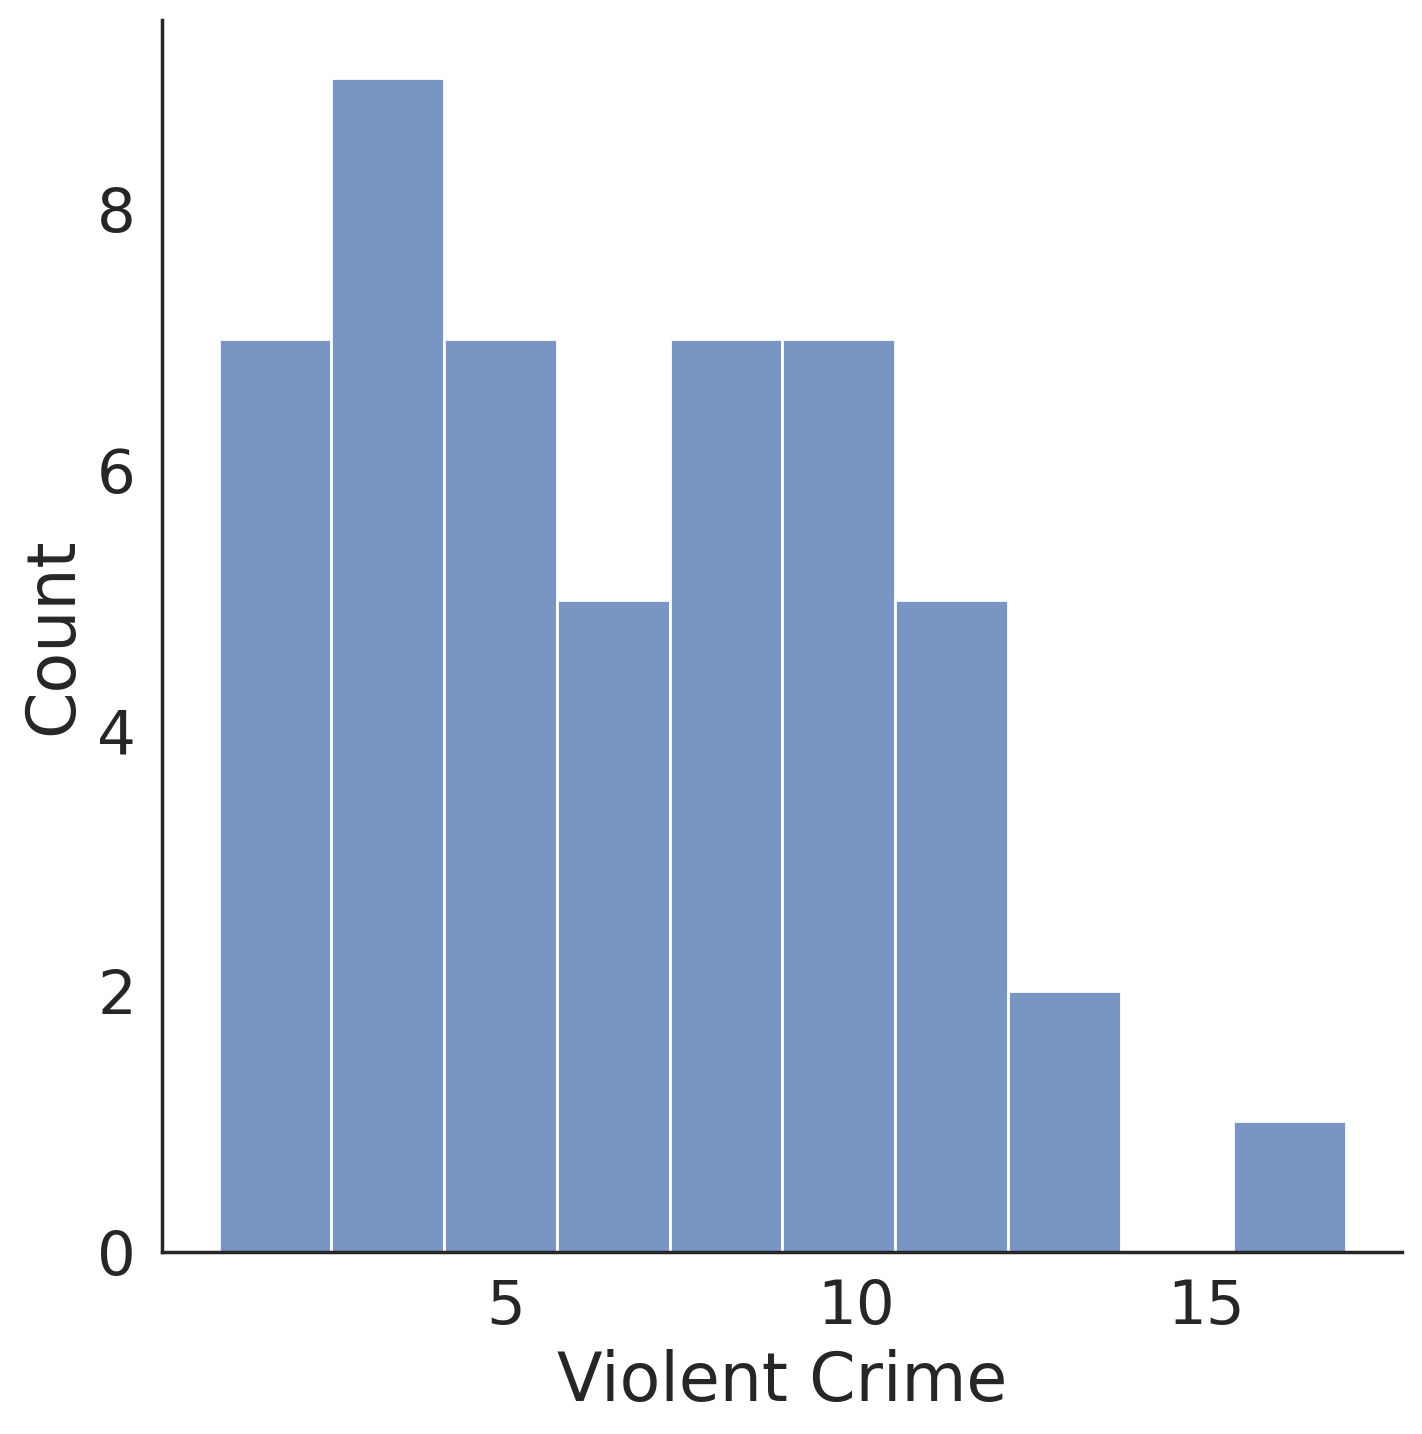

In [31]:
sns.histplot(df['ViolCrime'], bins=10)
plt.xlabel('Violent Crime');

In [32]:
df['ViolCrime'].describe()

,ViolCrime
count,50.000000
mean,6.712000
std,3.620274
min,0.900000
25%,3.900000
50%,6.250000
75%,9.325000
max,17.000000


In [33]:
# add a new categorical column for a 'Violent' state, arbitrarily pick a threshold from histogram
df['Violent'] = df['ViolCrime'].apply(lambda x: 0 if x < 11 else 1)
df.head()

<ipython-input-33-4f53ff429f2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Violent'] = df['ViolCrime'].apply(lambda x: 0 if x < 11 else 1)


,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth,Violent
Location,,,,,,
Alabama,20.1,31.5,88.7,11.2,54.5,1
Alaska,7.1,18.9,73.7,9.1,39.5,0
Arizona,16.1,35.0,102.5,10.4,61.2,0
Arkansas,14.9,31.6,101.7,10.4,59.9,0
California,16.7,22.6,69.1,11.2,41.1,1


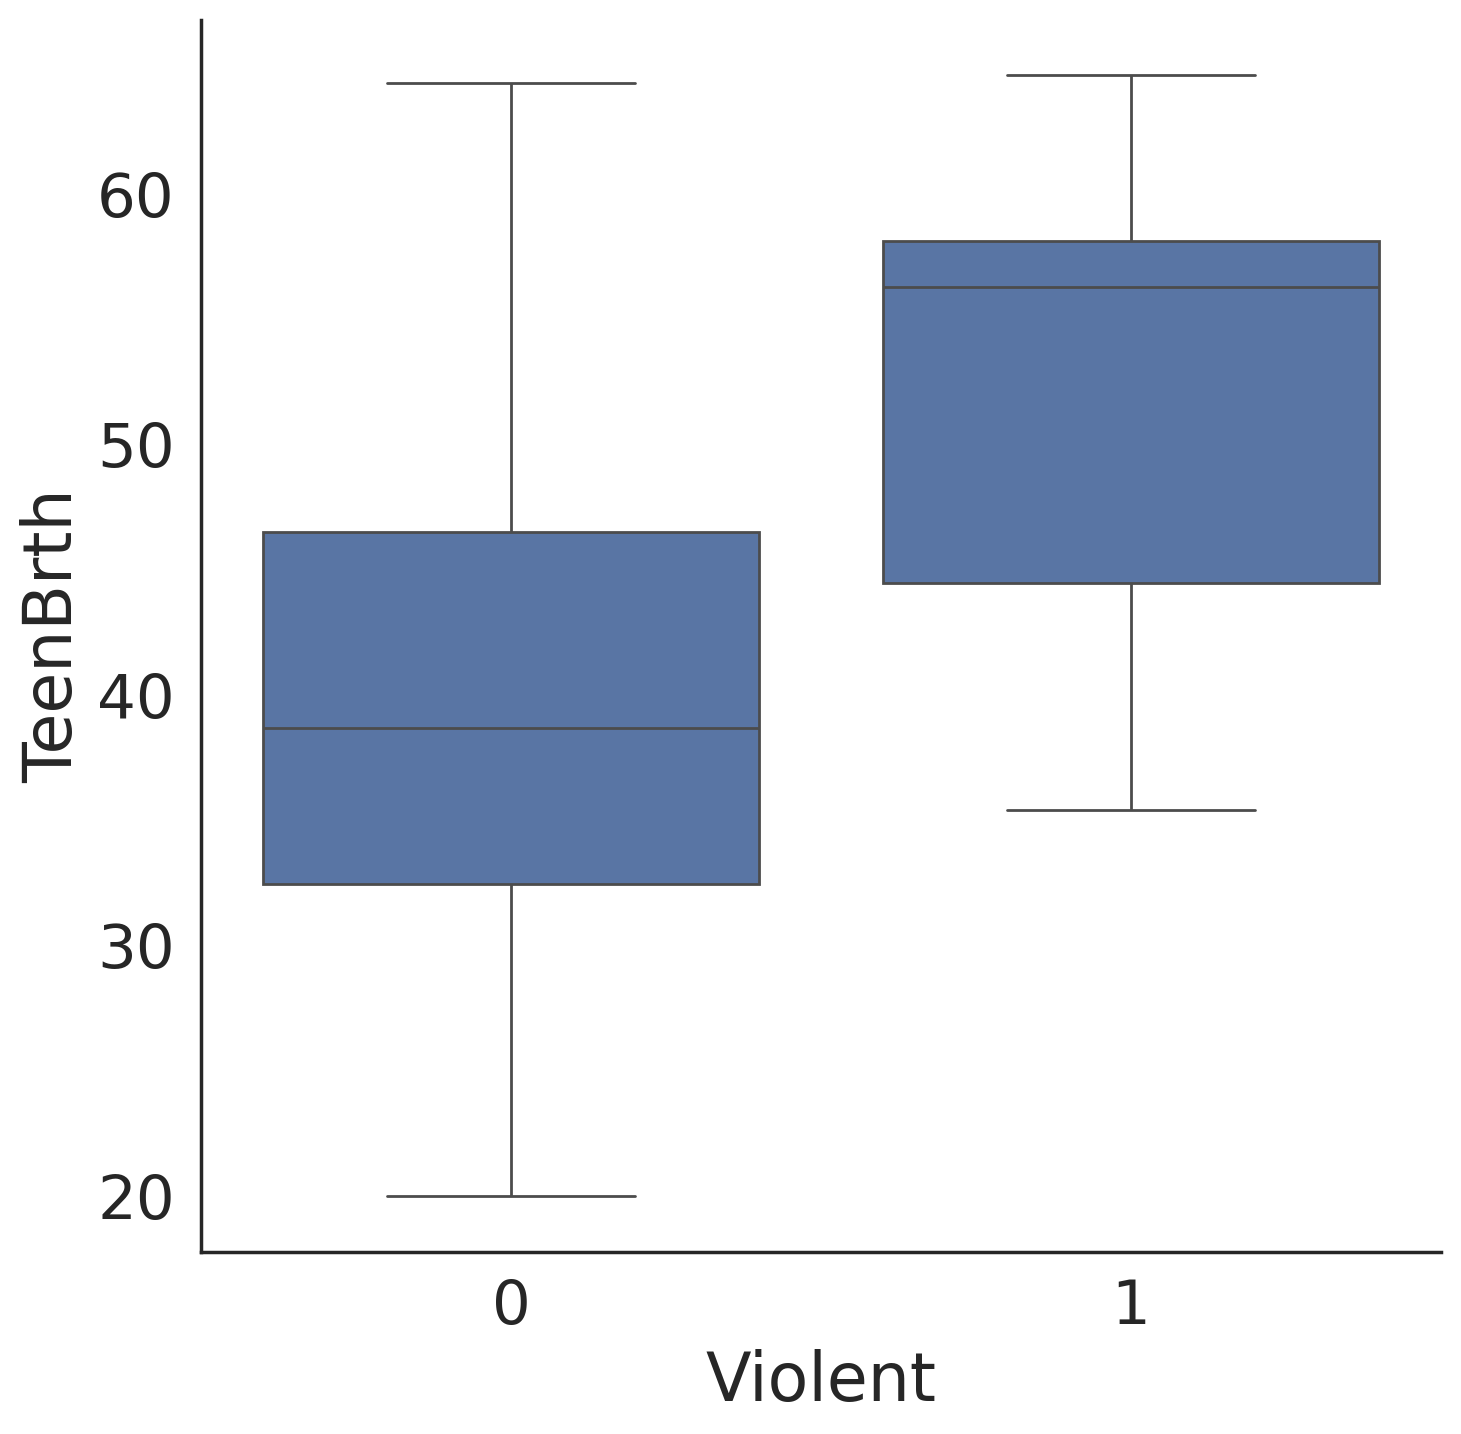

In [34]:
sns.boxplot(x='Violent', y='TeenBrth', data=df);

In [36]:
mod = smf.ols(formula='TeenBrth ~ PovPct + C(Violent)', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     19.53
Date:                Mon, 05 May 2025   Prob (F-statistic):           6.70e-07
Time:                        21:49:26   Log-Likelihood:                -178.83
No. Observations:                  50   AIC:                             363.7
Df Residuals:                      47   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          17.1051      4.441     

# Difference in means: t-test

The t-test tests for a difference in means between two groups.  Now that we have a categorical variable we can use a t-test to ask if there is a difference between violent states and non-violent ones in terms of teen birth rate

Student's t-test assumptions:

- Data are continuous
- Normally distributed
- Large enough sample size
- Equal variance b/w groups


$H_0: \bar x = \bar y$

$H_a: \bar x \ne \bar y$

In [37]:
df.groupby(['Violent'])['TeenBrth'].mean()

,TeenBrth
Violent,
0,40.306818
1,51.966667


$H_0: \bar x_{ViolentTeenBirthRate} = \bar y_{NotViolentTeenBirthRate}$

$H_a: \bar x_{ViolentTeenBirthRate} \ne \bar y_{NotViolentTeenBirthRate}$

In [ ]:
group1 = df.where(df.Violent==0).dropna()['TeenBrth']
group2 = df.where(df.Violent==1).dropna()['TeenBrth']

In [ ]:
ttest_ind(group1, group2)

The p-value here is $0.02$ ...which means that observing this difference in means due to random chance alone is unlikely.

By standard inferential threshold of $p=0.05$ we could reject the null in favor of the alternative hypothesis, concluding that the means between the groups are not the same and that violence is associated with an increase in Teen Birth Rate.

I would personally tend to just report the p value, rather than using language like "this is statistically significant" or "we reject the null".  The p-value is a measure of how much evidence there is for rejecting the null, but you can let the reader decide for themselves what they think.

NOW bad news... if we pick a different threshold for violence in a state, or if we kept DC in the data these values (and conclusion) would probably change!!!

# Multicolinearity
Lets force a colinearity problem by making a synthetic variable to show you what to look out for...

specifically note that
1. condition number is large... that's diagnosing the issue
2. coefficient on violent crime changes dramatically from before
3. coefficient on psuedoVC is similar in magnitude to violent crime, robbing it of the explanatory power it deserves
4. the sum of coefficients doesn't arrive at the total it was at in previous model... again robbing it of explanatroy power

In [ ]:
df['psuedoVC'] = df['ViolCrime'] * 3.6 + 112 + 5*np.random.rand(len(df))
mod = smf.ols(formula='TeenBrth ~ PovPct + ViolCrime + psuedoVC', data=df)
res = mod.fit()
print(res.summary())

# Regression with transformed data

So far, we've been working with data that were approximately Normal and didn't require transformation. But that won't always be the case...

In [ ]:
sleep = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/msleep.csv')
sleep.head()

What if we were interested in quantifying the **effect that REM sleep has on total sleep**?

We may hypothesize that the more REM sleep an animal gets the less total sleep it needs.

In [ ]:
sns.histplot(sleep['sleep_rem'].dropna())
plt.xlabel('REM Sleep (hours/night)');

These data are skewed right, and transforming these data could help us use them in analysis...

In [ ]:
sns.scatterplot(x='sleep_rem', y='sleep_total', data=sleep, s=100)
plt.xlabel('REM Sleep')
plt.ylabel('Total Sleep');

This relationship is not linear...so linear regression would not be appropriate

### Log Transformation

In [ ]:
# add log-transofmed column to sleep_rem & brainwt
sleep['sleep_rem10'] = np.log10(sleep['sleep_rem'])

In [ ]:
# this now looks less skewed, more bell shaped
sns.histplot(sleep['sleep_rem10'].dropna())
plt.xlabel('log10(REM Sleep)');

In [ ]:
# and therefore, this now looks closer to a linear relationship
sns.scatterplot(x='sleep_rem10', y='sleep_total', data=sleep, s=100)
plt.xlabel('log10(REM Sleep)')
plt.ylabel('Total Sleep');

### Linear regression with transformed data

In [ ]:
# carry out regression using log-transformed predictor

mod = smf.ols(formula='sleep_total ~ sleep_rem10', data=sleep)
res = mod.fit()
print(res.summary())

In [ ]:
# view our log transformed lmplot
sns.lmplot(x='sleep_rem10',y='sleep_total',data=sleep);

In [ ]:
# compare above to the lmplot without log transformation
sns.lmplot(x='sleep_rem',y='sleep_total',data=sleep);

Here, we see that the $\beta_1$ estimate for `sleep_rem10` is 10.89....but remember that this value is on the log scale.

$$ Total Sleep = 8.57 + 10.89  * log_{10}(REM Sleep) $$

To interpret this coefficient, we would say that

a 1 unit increase in REM sleep, Total Sleep increases by $\approx$ $10.89/100$ units.

In [ ]:
# interpreting a log transformed coefficient
10.89 / 100

So, for each 1 hour increase in REM Sleep, Total Sleep increases by 0.11 hours.

That's not a large effect, but it is different than what we hypothesized at the beginning!

More on interpretation of log transformed variables can be read [here](https://www.cscu.cornell.edu/news/statnews/stnews83.pdf)

### Why is log-transformation not math trickery?

First, some reading on data transformation can be found [here](http://fmwww.bc.edu/repec/bocode/t/transint.html). It's not beautifully formatted, but I think it is written in a more-straightforward manner than some [other](https://stats.stackexchange.com/questions/4831/regression-transforming-variables/4833#4833) [places](https://stats.stackexchange.com/questions/298/in-linear-regression-when-is-it-appropriate-to-use-the-log-of-an-independent-va) [online](https://www.researchgate.net/post/Why_do_we_do_transformation_before_data_analysis).

But a basic understanding can be had in just a few bullet points
- measurement scales may be arbitrary. there's nothing to say log transforms aren't a better measurement scale than the original
- you are already familiar with many logrithmic measurement scales: decibels and Richter scale for measuring earthqueakes are two examples
- lots of things are power-law distributed or close to power-law distributed... the frequency of words in a language, human vision and auditory abilities in perception, the number of social media followers people have.
- log transforms make a process that had been multiplicative or power law like ($a*b^n$) into an additive process ($a+n*b$) which really helps when you're trying to apply linear regression for obvious reasons
- log transforms can reduce heteroscadacity and skewness, which may make the data amenable to linear regression when it hadn't been before

The first thing to remember is there is (in most cases) nothing special about how the data are originally expressed.

In our example above, there is nothing about "hours" as the unit that was chosen that makes these data "correct".

So, while it _feels_ like data transformation is trickery, our initial unit of hours is...in some ways arbitrary and something that we chose.

This is where we'll start with our argument that it's ok to transform (or think of it as *re-express*) our data
so that it can be (still-accurately) used with well-studied models.

To make the point a little more concretely, all the following things are measured on a log scale: pH (measurement of acidity), dB (measure of sound loudness), and Richter scale (earthquake intensity). All of them _could_ be measured  on a linear scale. Those measurements would still explain those things...it would just be on a different scale.

In other words:
    
> "Transformations are needed because there is no guarantee that the world works on the scales it happens to be measured on."

What *does* differ however, is the interprtation. Linear scales tell us absolute change, while logarithmic scales tell us relative change.

# Differences in means by ANOVA

What if we have more than two possible levels in our categorical variable?  T-tests are for only two things, e.g. male/female, violent/non-violent.  What if we have regions of the US, like midwest, west, northeast... there's more than two of those!

Thats where a group-wise test like ANOVA (Analysis of Variance) is perfect

Parametric ANOVA test assumptions

- Population distributions are normal
- Samples have equal variances
- Independence

Hypothesis

$H_0: \bar x_1 = \bar x_2 = \bar x_3 \ldots $

$H_a: $ at least one group mean is different


In [ ]:
regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
regions = regions.rename({'State':'Location'},axis=1).set_index('Location')
regions.index = regions.index.str.replace(' ','_')

In [ ]:
df = df.join(regions['Region'])
df

So how would you run an ANOVA checking for a difference in TeenBrth across regions?

this is left as an exercise to the reader. But there are two major options for you.  If you want to manually group the categorical variable ($\bar x_1 = \bar x_2 = \bar x_3$) you can use scipy:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

If you want to build a model that is more precise or custom, with automatic grouping by a variable inside the dataframe then you can use statsmodels:
https://www.statsmodels.org/dev/anova.html

In [ ]:
regions.index = regions.index.str.replace(' ','_')